In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

In [2]:
paths = [
    "resources/DJI_20231031123704_0017_W.JPG",
    "resources/DJI_20231031123719_0022_W.JPG",
    "resources/DJI_20231031123746_0031_W.JPG"
]
orig_imgs = [cv2.imread(path, cv2.IMREAD_COLOR) for path in paths]
small_imgs = [cv2.resize(orig_img, None, fx=0.4, fy=0.4, interpolation=cv2.INTER_AREA) for orig_img in orig_imgs]

In [3]:
def vert_concat(*args):
    return np.concatenate([*args], axis=0)

def horiz_concat(*args):
    return np.concatenate([*args], axis=1)

def imshow(img: np.ndarray, scale=1.0, in_bgr=False):
    if in_bgr:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
    
    display(Image.fromarray(img))

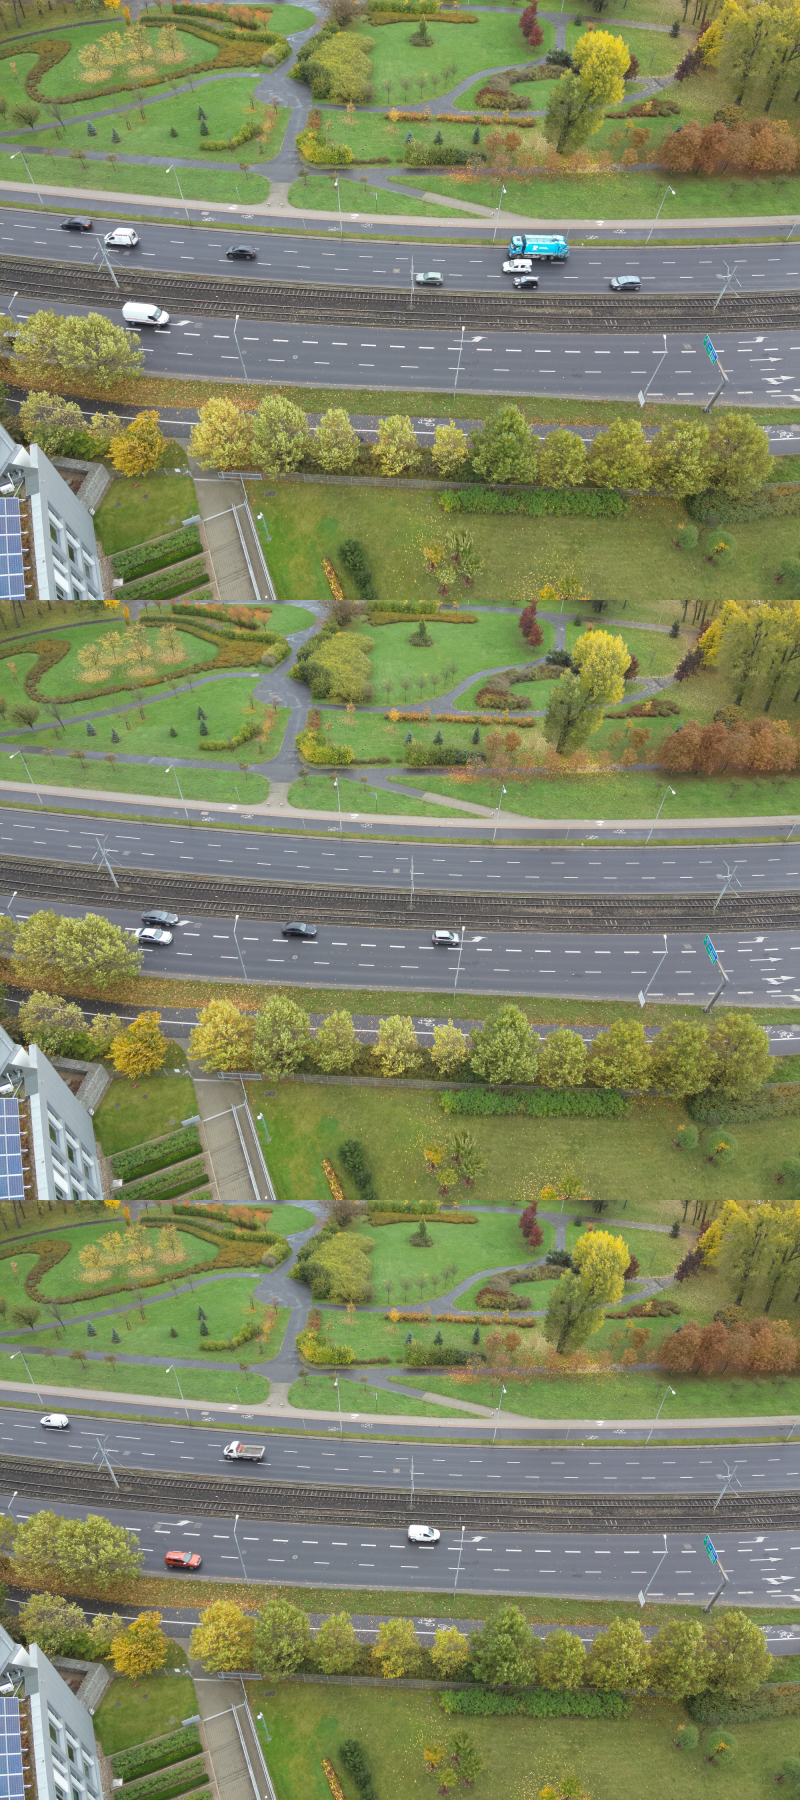

In [4]:
imshow(vert_concat(*small_imgs), in_bgr=True)

## Attempt 1
1. Notice that roads are dark, so that we could try to take min value of images. Create
two copies of solution.

2. Out of the 5 pictures (3 original, 2 mins), take the median

In [53]:
from copy import deepcopy

In [112]:
def get_min_pixel_image(images: list[np.ndarray]) -> np.ndarray:
    img_copy = deepcopy(images)
    img_copy = np.stack(images, axis=0)

    img_helper = img_copy[...,0] + img_copy[..., 1] + img_copy[..., 2]
    img_helper = np.argmin(img_helper, axis=0)
    img_helper = np.repeat(img_helper[:, :, np.newaxis], 3, axis=2)

    img_result = np.zeros_like(img_helper)
    for (i, image) in enumerate(img_copy):
        img_result = np.where(img_helper == i, image, img_result)
    
    img_result = img_result.astype(np.uint8)

    return img_result

In [118]:
def get_median(images):
    print(len(images))
    result = np.median(images, axis=0).astype(np.uint8)
    print(result.shape)
    return result

4
(600, 800, 3)


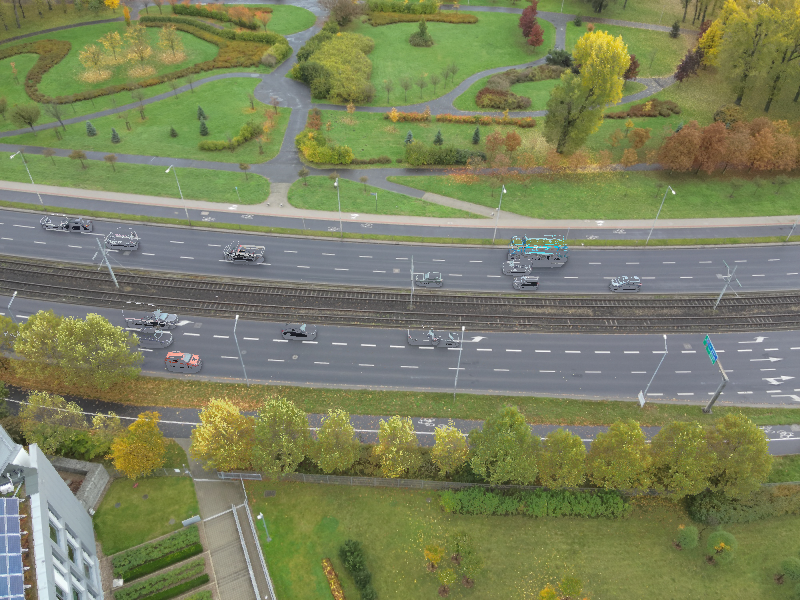

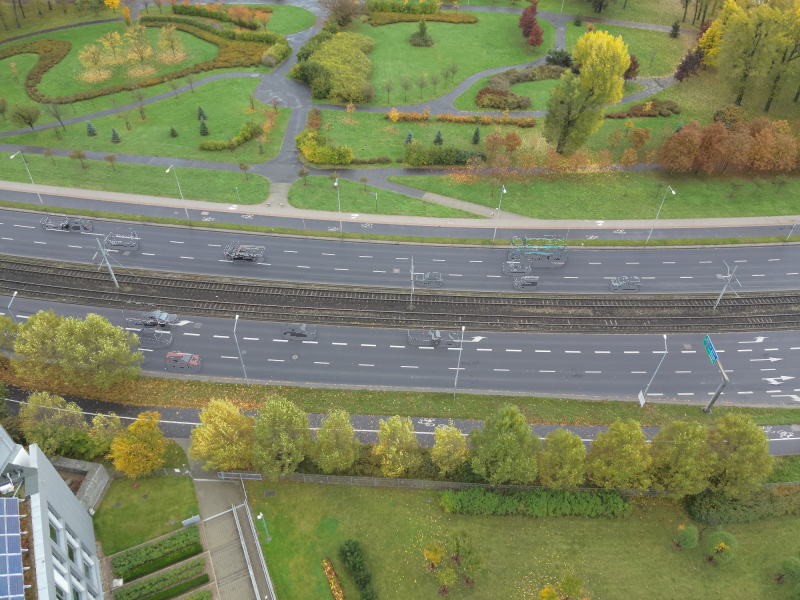

In [122]:
images = deepcopy(small_imgs)
min_image = get_min_pixel_image(images)
images.append(min_image)
med_image = get_median(images)
imshow(min_image, in_bgr=True)
imshow(med_image, in_bgr=True)